In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%load_ext nb_black
warnings.filterwarnings("ignore")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [2]:
df = sns.load_dataset('iris')

In [3]:
X = df.drop(columns=['species'])
y = df['species']

In [99]:
"""
thật ra iris có bộ dataset quá chuẩn nên thật ra ko cần thiết phải sử dụng ada 
"""

'\nthật ra iris có bộ dataset quá chuẩn nên thật ra ko cần thiết phải sử dụng ada \n'

<IPython.core.display.Javascript object>

### AdaBoosting Classifier
- mặc định dùng decisiontree

In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

<IPython.core.display.Javascript object>

In [59]:
ml = DecisionTreeClassifier()
ada = AdaBoostClassifier(base_estimator=ml, n_estimators=50, learning_rate=1)

<IPython.core.display.Javascript object>

In [60]:
# train model
ada.fit(X, y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1)

<IPython.core.display.Javascript object>

In [61]:
# dự đoán trên dữ liệu mới
X_new = [[4.5, 3.1, 1.4, 0.25], [6.5, 3.0, 4.3, 1.5], [5.9, 3.1, 5.2, 1.8]]
y_new = ada.predict(X_new)
y_new

C:\Users\trung\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


array(['setosa', 'versicolor', 'virginica'], dtype=object)

<IPython.core.display.Javascript object>

In [62]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(ada, X, y, cv=5)
scores

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

<IPython.core.display.Javascript object>

In [63]:
"""
xác thực 5 lần, số điểm lần lượt là: [0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ]
=> model ổn  định

"""

'\nxác thực 5 lần, số điểm lần lượt là: [0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ]\n=> model ổn  định\n\n'

<IPython.core.display.Javascript object>

In [64]:
ml.fit(X, y)

DecisionTreeClassifier()

<IPython.core.display.Javascript object>

In [65]:
y_new2 = ml.predict(X_new)
y_new2

C:\Users\trung\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['setosa', 'versicolor', 'virginica'], dtype=object)

<IPython.core.display.Javascript object>

In [68]:
scores2 = cross_val_score(ml, X, y, cv=5)
print("score of model uses ada", scores2)

score of model uses ada [0.96666667 0.96666667 0.9        1.         1.        ]


<IPython.core.display.Javascript object>

In [71]:
model_no_ada = DecisionTreeClassifier().fit(X, y)
scores3 = cross_val_score(model_no_ada, X, y, cv=5)

print("score of model not use ada", scores3)

score of model not use ada [0.96666667 0.96666667 0.9        0.93333333 1.        ]


<IPython.core.display.Javascript object>

In [29]:
'''
# kết quả nếu chỉ build = model decision tree mà ko sử dụng ada

=> kết quả cao hơn
=> ada đã tăng cường cho ml

'''

'\n=> kết quả cao hơn\n=> ada đã tăng cường cho ml\n\n'

### AdaBoosting Regression

In [80]:
X = df.drop(columns=["petal_width", "species"])
y = df["petal_width"]

<IPython.core.display.Javascript object>

In [81]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

<IPython.core.display.Javascript object>

In [82]:
ml = DecisionTreeRegressor()
ada = AdaBoostRegressor(base_estimator=ml, n_estimators=50, learning_rate=1)

<IPython.core.display.Javascript object>

In [83]:
# train model
ada.fit(X, y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=1)

<IPython.core.display.Javascript object>

In [84]:
# dự đoán trên dữ liệu mới
X_new = [[4.5, 3.1, 1.4], [6.5, 3.0, 4.3], [5.9, 3.1, 5.2]]
y_new = ada.predict(X_new)
y_new

C:\Users\trung\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


array([0.2, 1.5, 1.8])

<IPython.core.display.Javascript object>

In [91]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(ada, X, y, cv=5)
scores  # R-score

array([-0.59502262,  0.94611634,  0.44759207,  0.73144096, -0.04228267])

<IPython.core.display.Javascript object>

In [92]:
scores.mean()

0.2975688144047075

<IPython.core.display.Javascript object>

In [93]:
ml.fit(X, y)

DecisionTreeRegressor()

<IPython.core.display.Javascript object>

In [94]:
y_new2 = ml.predict(X_new)
y_new2

C:\Users\trung\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([0.2, 1.4, 1.8])

<IPython.core.display.Javascript object>

In [95]:
scores2 = cross_val_score(ml, X, y, cv=5)
scores2

array([-2.35972851,  0.86116711,  0.19971671,  0.63327944, -1.06238912])

<IPython.core.display.Javascript object>

In [96]:
y_predict_ada = ada.predict(X)
y_predict_ml = ml.predict(X)

<IPython.core.display.Javascript object>

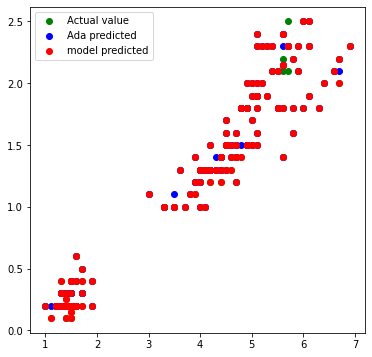

<IPython.core.display.Javascript object>

In [97]:
plt.figure(figsize=(6, 6))
plt.scatter(X["petal_length"], y, c="green", label="Actual value")
plt.scatter(X["petal_length"], y_predict_ada, c="blue", label="Ada predicted")
plt.scatter(X["petal_length"], y_predict_ml, c="red", label="model predicted")
plt.legend()
plt.show()

In [98]:
"""
=> kết quả dự đoán khá khớp
"""

'\n=> kết quả dự đoán khá khớp\n'

<IPython.core.display.Javascript object>

## XGBoost Classification

In [101]:
X = df.drop(columns=["species"])
y = df["species"]

<IPython.core.display.Javascript object>

In [102]:
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier

<IPython.core.display.Javascript object>

In [115]:
# ml = DecisionTreeClassifier()
ml = DecisionTreeClassifier()
model_xgb = xgb.XGBClassifier(
    base_estimator=ml, random_state=42
)  # mặc định là decisiontree

<IPython.core.display.Javascript object>

In [117]:
# train model
ml.fit(X, y)

DecisionTreeClassifier()

<IPython.core.display.Javascript object>

In [118]:
from sklearn.model_selection import cross_val_score

<IPython.core.display.Javascript object>

In [119]:
scores = cross_val_score(model_xgb, X, y, cv=5)
scores

[03:35:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "base_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:35:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:35:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "base_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistaken

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

<IPython.core.display.Javascript object>

In [120]:
ml.fit(X, y)

DecisionTreeClassifier()

<IPython.core.display.Javascript object>

In [122]:
# dự đoán trên dữ liệu mới
# X_new = [[4.5, 3.1, 1.4, 0.25],
#          [6.5, 3.0, 4.3, 1.5],
#          [5.9, 3.1, 5.2, 1.8]]
X_new = pd.DataFrame(
    {
        "sepal_length": [4.5, 6.5, 5.9],
        "sepal_width": [3.1, 3.0, 3.1],
        "petal_length": [1.4, 4.3, 5.2],
        "petal_width": [0.25, 1.5, 1.8],
    }
)
y_new = model_xgb.predict(X_new)
y_new

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<IPython.core.display.Javascript object>

In [123]:
scores2 = cross_val_score(ml, X, y, cv=5)
scores2

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

<IPython.core.display.Javascript object>

## XGBoost Regression

In [128]:
X = df.drop(columns=["petal_width", "species"])
y = df["petal_width"]

<IPython.core.display.Javascript object>

In [129]:
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor

<IPython.core.display.Javascript object>

In [132]:
ml = DecisionTreeRegressor()
model_xgb = xgb.XGBRegressor(base_estimator=ml, random_state=42)

<IPython.core.display.Javascript object>

In [133]:
# train model
model_xgb.fit(X, y)

[03:41:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "base_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_estimator=DecisionTreeRegressor(), base_score=0.5,
             booster='gbtree', colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

<IPython.core.display.Javascript object>

In [144]:
scores = cross_val_score(model_xgb, X, y, cv=5)
scores

[03:43:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "base_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:43:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "base_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:43:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "base_estimator" } might not be used.


array([-1.45127633,  0.91509326,  0.2982528 ,  0.71571386, -0.01432749])

<IPython.core.display.Javascript object>

In [145]:
scores.mean()



0.092691220169599

<IPython.core.display.Javascript object>

In [141]:
"""
nhìn chung thì mean cao
"""

'\nnhìn chung thì mean cao\n'

<IPython.core.display.Javascript object>

In [136]:
# dự đoán trên dữ liệu mới
X_new = pd.DataFrame(
    {
        "sepal_length": [4.5, 6.5, 5.9],
        "sepal_width": [3.1, 3.0, 3.1],
        "petal_length": [1.4, 4.3, 5.2],
    }
)
y_new = model_xgb.predict(X_new)
y_new

array([0.19776651, 1.3431941 , 1.8363715 ], dtype=float32)

<IPython.core.display.Javascript object>

In [137]:
print("Model R-squared:", model_xgb.score(X, y))

Model R-squared: 0.998656378853767


<IPython.core.display.Javascript object>

In [138]:
from sklearn.metrics import mean_squared_error

<IPython.core.display.Javascript object>

In [139]:
y_predicted = model_xgb.predict(X)
print("MSE:", mean_squared_error(y, y_predicted))

MSE: 0.0007754479536976577


<IPython.core.display.Javascript object>

In [140]:
"""
R-square cao và MSE thấp
=> model phù hợp
"""

'\nR-square cao và MSE thấp\n=> model phù hợp\n'

<IPython.core.display.Javascript object>